In [72]:
import warnings
warnings. simplefilter(action='ignore', category=Warning)
import pandas as pd
import numpy as np
import pandas_ta as ta
import plotly.graph_objects as go
from plotly.subplots import make_subplots as ms
import backtesting
from backtesting import Strategy, Backtest
from tabulate import tabulate

In [73]:
def create_dataframe_from_csv(csv):
    data = pd.read_csv(csv, sep='\t')
    data.drop(columns=['<VOL>', '<SPREAD>'], inplace=True)
    data.columns = ['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Vol']
    data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
    new_cols = ['datetime', 'Open', 'High', 'Low', 'Close', 'Vol', 'Date', 'Time']
    data = data.reindex(columns=new_cols)
    data.set_index('datetime', drop=True, inplace=True)
    return data

In [74]:
df = create_dataframe_from_csv('EURUSD_H4.csv')

In [75]:
df['ema5'] = ta.ema(df['Close'], length=5)
df['ema25'] = ta.ema(df['Close'], length=25)
df['ema30'] = ta.ema(df['Close'], length=30)

In [76]:
help(ta.macd)

Help on function macd in module pandas_ta.momentum.macd:

macd(close, fast=None, slow=None, signal=None, talib=None, offset=None, **kwargs)
    Moving Average Convergence Divergence (MACD)

    The MACD is a popular indicator to that is used to identify a security's trend.
    While APO and MACD are the same calculation, MACD also returns two more series
    called Signal and Histogram. The Signal is an EMA of MACD and the Histogram is
    the difference of MACD and Signal.

    Sources:
        https://www.tradingview.com/wiki/MACD_(Moving_Average_Convergence/Divergence)
        AS Mode: https://tr.tradingview.com/script/YFlKXHnP/

    Calculation:
        Default Inputs:
            fast=12, slow=26, signal=9
        EMA = Exponential Moving Average
        MACD = EMA(close, fast) - EMA(close, slow)
        Signal = EMA(MACD, signal)
        Histogram = MACD - Signal

        if asmode:
            MACD = MACD - Signal
            Signal = EMA(MACD, signal)
            Histogram = MA

In [77]:
df[['macd', 'hist', 's_line']] = ta.macd(close=df['Close'], fast=12, slow=26, signal=9)

In [78]:
df.dropna(subset=['ema30'], inplace=True)

In [79]:
df.dropna(subset=['macd'], inplace=True)

In [126]:
df[20:40]

,Open,High,Low,Close,Vol,Date,Time,ema5,ema25,ema30,macd,hist,s_line
datetime,,,,,,,,,,,,,
2010-01-14 20:00:00,1.45104,1.45144,1.44918,1.44978,4036,2010.01.14,20:00:00,1.450352,1.448756,1.447968,0.001881,-0.000634,0.002515
2010-01-15 00:00:00,1.44978,1.45108,1.44096,1.44266,6602,2010.01.15,00:00:00,1.447788,1.448287,1.447626,0.001116,-0.001119,0.002235
2010-01-15 04:00:00,1.44265,1.44444,1.44064,1.44262,6479,2010.01.15,04:00:00,1.446066,1.447851,1.447303,0.000501,-0.001387,0.001888
2010-01-15 08:00:00,1.44261,1.44275,1.43830,1.43900,9962,2010.01.15,08:00:00,1.443710,1.447171,1.446767,-0.000276,-0.001731,0.001455
2010-01-15 12:00:00,1.43797,1.43977,1.43593,1.43843,10117,2010.01.15,12:00:00,1.441950,1.446498,1.446229,-0.000926,-0.001905,0.000979
2010-01-15 16:00:00,1.43844,1.43865,1.43558,1.43759,9160,2010.01.15,16:00:00,1.440497,1.445813,1.445672,-0.001493,-0.001977,0.000485
2010-01-15 20:00:00,1.43762,1.43912,1.43365,1.43857,4681,2010.01.15,20:00:00,1.439855,1.445256,1.445214,-0.001841,-0.001861,0.000019
2010-01-18 00:00:00,1.43480,1.43748,1.43348,1.43559,5866,2010.01.18,00:00:00,1.438433,1.444512,1.444593,-0.002331,-0.001880,-0.000451
2010-01-18 04:00:00,1.43558,1.43931,1.43536,1.43856,5911,2010.01.18,04:00:00,1.438475,1.444054,1.444204,-0.002451,-0.001600,-0.000851


In [154]:
def plot_graph(dfpl):
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    
    fig = make_subplots(rows=2, cols=1)
    fig.add_trace(go.Candlestick(x=dfpl.index,
                                    open=dfpl['Open'],
                                    high=dfpl['High'],
                                    low=dfpl['Low'],
                                    close=dfpl['Close'],
                                    name='OHLC'), row=1, col=1)
    # fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
    #                                      open=dfpl['Open'],
    #                                      high=dfpl['High'],
    #                                      low=dfpl['Low'],
    #                                      close=dfpl['Close'],
    #                                      name='OHLC')])
    # print('b')
    fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['ema5'], mode='lines', line=dict(color='pink', width=1), name='5 EMA'), row=1, col=1)
    fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['ema25'], mode='lines', line=dict(color='darkgreen', width=1), name ='25 EMA'), row=1, col=1)
    fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['ema30'], mode='lines', line=dict(color='darkorchid', width=1), name='30 EMA'), row=1, col=1)
    fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['macd'], mode='lines', line=dict(color='aqua', width=2), name='MACD'), row=2, col=1)
    fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['s_line'], mode='lines', line=dict(color='red', width=2), name='Signal Line'), row=2, col=1)
    fig.add_hline(y=0, line=dict(color='darkgrey', width=1, dash='dash'), row=2, col=1)
    fig.update_layout(width=1200, height=900, margin=dict(t=0, l=0, b=0, r=0), paper_bgcolor='black', plot_bgcolor='black')
    fig.update_xaxes(gridcolor='black', zerolinecolor='black')
    fig.update_yaxes(gridcolor='black', zerolinecolor='black')
    fig.show()

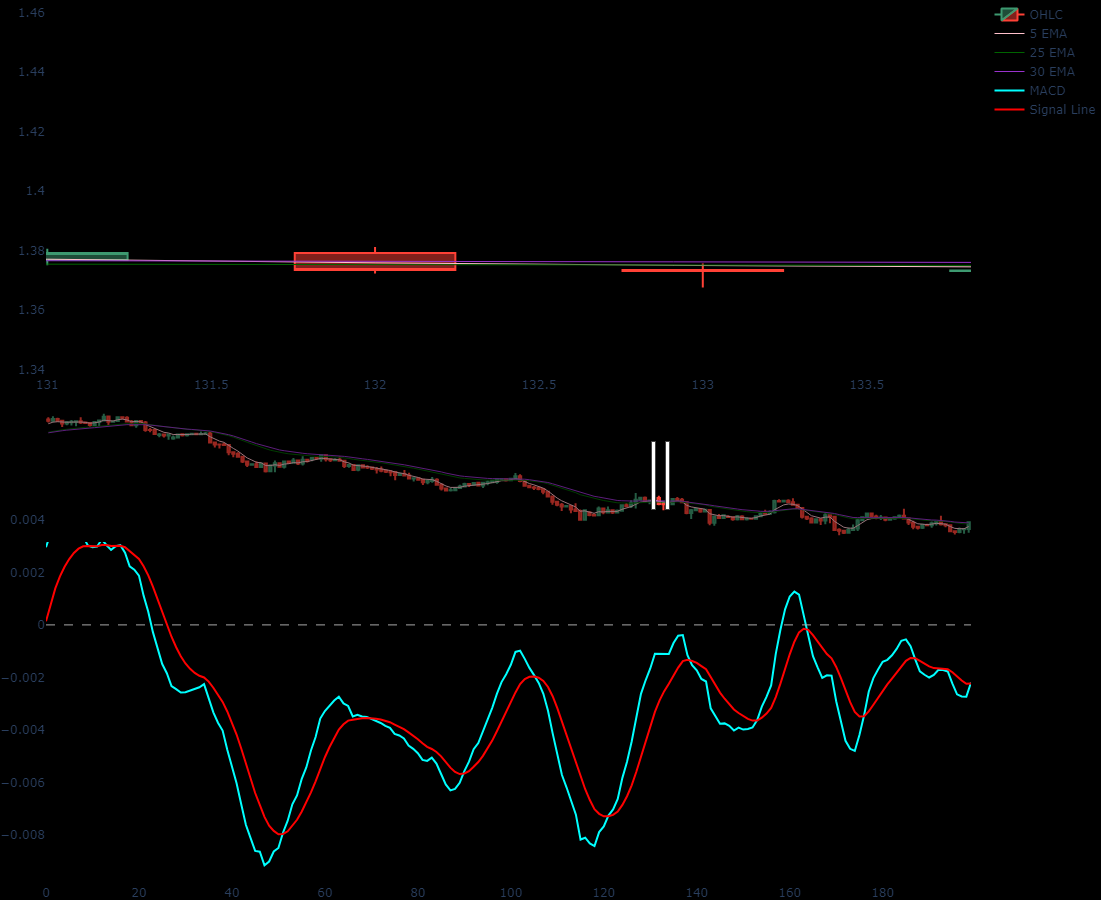

In [155]:
data = df.reset_index()
data = data[0:200]
plot_graph(data)

In [183]:
data[20: 40]

,datetime,Open,High,Low,Close,Vol,Date,Time,ema5,ema25,ema30,macd,hist,s_line
20,2010-01-14 20:00:00,1.45104,1.45144,1.44918,1.44978,4036,2010.01.14,20:00:00,1.450352,1.448756,1.447968,0.001881,-0.000634,0.002515
21,2010-01-15 00:00:00,1.44978,1.45108,1.44096,1.44266,6602,2010.01.15,00:00:00,1.447788,1.448287,1.447626,0.001116,-0.001119,0.002235
22,2010-01-15 04:00:00,1.44265,1.44444,1.44064,1.44262,6479,2010.01.15,04:00:00,1.446066,1.447851,1.447303,0.000501,-0.001387,0.001888
23,2010-01-15 08:00:00,1.44261,1.44275,1.43830,1.43900,9962,2010.01.15,08:00:00,1.443710,1.447171,1.446767,-0.000276,-0.001731,0.001455
24,2010-01-15 12:00:00,1.43797,1.43977,1.43593,1.43843,10117,2010.01.15,12:00:00,1.441950,1.446498,1.446229,-0.000926,-0.001905,0.000979
25,2010-01-15 16:00:00,1.43844,1.43865,1.43558,1.43759,9160,2010.01.15,16:00:00,1.440497,1.445813,1.445672,-0.001493,-0.001977,0.000485
26,2010-01-15 20:00:00,1.43762,1.43912,1.43365,1.43857,4681,2010.01.15,20:00:00,1.439855,1.445256,1.445214,-0.001841,-0.001861,0.000019
27,2010-01-18 00:00:00,1.43480,1.43748,1.43348,1.43559,5866,2010.01.18,00:00:00,1.438433,1.444512,1.444593,-0.002331,-0.001880,-0.000451
28,2010-01-18 04:00:00,1.43558,1.43931,1.43536,1.43856,5911,2010.01.18,04:00:00,1.438475,1.444054,1.444204,-0.002451,-0.001600,-0.000851
29,2010-01-18 08:00:00,1.43859,1.43905,1.43652,1.43782,7495,2010.01.18,08:00:00,1.438257,1.443575,1.443792,-0.002576,-0.001381,-0.001196


In [200]:
def generate_signals(data):
    signal= [0] * len(data)
    signal_low = [0] * len(data)
    signal_high = [0] * len(data)
    signal_index = [0] * len(data)
    for i in range(len(data)):

        ema5_above_ema30 = data['ema5'][i] > data['ema30'][i]
        previously_ema5_lower_than_ema30 = data['ema5'][i-1] <= data['ema30'][i-1]
        both_macd_signal_line_negative_and_macd_above_signal_line = 0 > data['macd'][i] > data['s_line'][i]
        
        if ema5_above_ema30 and previously_ema5_lower_than_ema30 and both_macd_signal_line_negative_and_macd_above_signal_line:
            print('1: ', i)
            for x in range(i, len(data)):
                
                ema25_higher_than_ema30 = data['ema25'][x] > data['ema30'][x]
                close_below_ema5 = data['Close'][x] < data['ema5'][x]
                close_above_ema5 = data['Close'][x] > data['ema5'][x]
                has_retraced_to_ema25_or_ema30 = ((data['Low'][x] - data['ema25'][x]) <= 0.0002) if ema25_higher_than_ema30\
                                                else ((data['Low'][x] - data['ema30'][x]) <= 0.0002)
                ema5_still_above_ema25_or_ema30 = (data['ema5'][x] >= data['ema25'][x] if ema25_higher_than_ema30\
                                                   else data['ema5'][x] >= data['ema30'][x])
                macd_still_above_signal_line = data['macd'][x] > data['s_line'][x]
                
                if (close_below_ema5 or close_above_ema5) and has_retraced_to_ema25_or_ema30 and ema5_still_above_ema25_or_ema30\
                and macd_still_above_signal_line:
                    print('2: ', x)
                    
                    if close_below_ema5:
                        signal[x] = 1
                        signal_low[x] = data['Low'][x]
                        signal_index[x] = x
                        break
                    else:
                        for y in range(x+1, len(data)):

                            ema25_higher_than_ema30 = data['ema25'][y] > data['ema30'][y]
                            close_above_ema5 = data['Close'][y] > data['ema5'][y]
                            ema5_has_almost_retraced_to_ema25_or_ema30 = (data['ema5'][y] >= data['ema25'][y]) if ema25_higher_than_ema30\
                                                                        else (data['ema5'][y] >= data['ema30'][y])
                            macd_still_above_signal_line = data['macd'][y] > data['s_line'][y]
                            
                            if close_above_ema5 and ema5_has_almost_retraced_to_ema25_or_ema30 and macd_still_above_signal_line:
                                print('3: ', y)
                                signal[y] = 1
                                signal_low[y] = df['Low'][x:y+1].min()
                                signal_index[y] = y
                                break
        elif (data['ema5'][i] < data['ema30'][i]) and (data['ema5'][i-1] >= data['ema30'][i-1]) and (0 < data['macd'][i] < data['s_line'][i]):
            print('4: ', i)
            for x in range(i, len(data)):
                ema25_lower_than_ema30 = data['ema25'][x] < data['ema30'][x]
                close_above_ema5 = data['Close'][x] > data['ema5'][x]
                close_below_ema5 = data['Close'][x] < data['ema5'][x]
                has_retraced_to_ema25_or_ema30 = ((data['ema25'][x] - data['High'][x]) <= 0.0002) if ema25_lower_than_ema30\
                                                else ((data['ema30'][x] - data['High'][x]) <= 0.0002)
                ema5_still_below_ema25_or_ema30 = (data['ema5'][x] <= data['ema25'][x] or data['ema5'][x] <= data['ema30'][x])
                macd_still_below_signal_line = data['macd'][x] < data['s_line'][x]
                if (close_above_ema5 or close_below_ema5) and has_retraced_to_ema25_or_ema30 and ema5_still_below_ema25_or_ema30\
                and macd_still_below_signal_line:
                    print('5: ', x)
                    if close_below_ema5:
                        signal[x] = -1
                        signal_high[x] = data['High'][x]
                        signal_index[x] = x
                        break
                    else:
                        for y in range(x+1, len(data)):
                            close_below_ema5 = data['Close'][y] < data['ema5'][y]
                            ema5_has_almost_retraced_to_ema25_or_ema30 = (data['ema5'][y] <= data['ema25'][y]) or (data['ema5'][y] <= data['ema30'][y])
                            macd_still_below_signal_line = data['macd'][y] < data['s_line'][y]
                            if close_below_ema5 and ema5_has_almost_retraced_to_ema25_or_ema30 and macd_still_below_signal_line:
                                print('6: ', y)
                                signal[y] = -1
                                signal_high[y] = df['Low'][x:y+1].max()
                                signal_index[y] = y
                                break
    print(len(signal), len(signal_low), len(signal_high), len(signal_index), len(data))
    print(signal[131])
    print(signal[136])
    return signal, signal_low, signal_high, signal_index

In [201]:
df[['signal', 'signal_low', 'signal_high', 'signal_index']] = generate_signals(df.head(200))

4:  22
5:  35
1:  131
2:  131
3:  136
2:  157
3:  158
2:  184
1:  136
2:  157
3:  158
2:  184
1:  157
2:  157
3:  158
2:  184
1:  184
2:  184
200 200 200 200 200
0
1


ValueError: Columns must be same length as key

In [182]:
print('No. of positive signals: ', len(df[df['signal']== 1]))
print('No. of negative signals: ', len(df[df['signal']== -1]))
print('No. of no signals: ', len(df[df['signal']==0]))

KeyError: 'signal'

In [26]:
class Backtest:
    def __init__(self):
        self.columns = ['Capital', 'Trade', 'Entry Time', 'Entry Price', 'SL', 'TP', 'Exit Time', 'Exit Price', 'Exit Type', '5EMA', '25EMA', '30EMA', 'MACD', 'S_LINE', 'Quantity', 'Position Size', 'PNL', '% PNL', 'Resulting Capital', 'Holding Period']
        self.backtesting = pd.DataFrame(columns=self.columns)
        self.trade_logs = []

    def buy(self, capital, entry_time, entry_price, qty, sl, tp, exit_price, exit_time, ema5, ema25, ema30, macd, s_line, pnl, res_cap, charge):
        self.trade_log = dict(zip(self.columns, [None] * len(self.columns)))
        pos_size = qty * entry_price
        pNl = (pnl - charge)
        pnl = format(pNl, '.2f')
        self.trade_log['Capital'] = capital
        self.trade_log['Trade'] = 'Long Open'
        self.trade_log['Quantity'] = qty
        self.trade_log['Position Size'] = round(pos_size, 5)
        self.trade_log['Entry Time'] = entry_time
        self.trade_log['Entry Price'] = entry_price
        self.trade_log['Exit Price'] = exit_price
        self.trade_log['TP'] = tp
        self.trade_log['SL'] = sl
        self.trade_log['Exit Time'] = exit_time
        self.trade_log['Trade'] = 'Long Closed'
        self.trade_log['Exit Type'] = 'Exit Triggered'
        self.trade_log['PNL'] = round(pNl, 5)
        self.trade_log['5EMA'] = ema5
        self.trade_log['25EMA'] = ema25
        self.trade_log['30EMA'] = ema30
        self.trade_log['MACD'] = macd
        self.trade_log['S_LINE'] = s_line
        self.trade_log['Resulting Capital'] = res_cap
        self.trade_log['% PNL'] = round((self.trade_log['PNL'] / self.trade_log['Capital']) * 100, 3)
        self.trade_log['Holding Period'] = exit_time - self.trade_log['Entry Time']
        self.backtesting = self.backtesting._append(self.trade_log, ignore_index=True)

    def sell(self, capital, entry_time, entry_price, qty, sl, tp, exit_price, exit_time, ema5, ema25, ema30, macd, s_line, pnl, res_cap, charge):
        self.trade_log = dict(zip(self.columns, [None] * len(self.columns)))
        # capital = format(capital, '.2f')
        pos_size = qty * entry_price
        # qty = format(qty, '.2f')
        # position_size = format(pos_size, '.2f')
        pNl = (pnl - charge)
        # pnl = format(pNl, '.2f')
        self.trade_log['Capital'] = capital
        self.trade_log['Trade'] = 'Short Open'
        self.trade_log['Quantity'] = qty
        self.trade_log['Position Size'] = round(pos_size, 5)
        self.trade_log['Entry Time'] = entry_time
        self.trade_log['Entry Price'] = entry_price
        self.trade_log['Exit Price'] = exit_price
        self.trade_log['TP'] = tp
        self.trade_log['SL'] = sl
        self.trade_log['Exit Time'] = exit_time
        self.trade_log['Trade'] = 'Short Closed'
        self.trade_log['Exit Type'] = 'Exit Triggered'
        self.trade_log['PNL'] = round(pNl, 5)
        self.trade_log['5EMA'] = ema5
        self.trade_log['25EMA'] = ema25
        self.trade_log['30EMA'] = ema30
        self.trade_log['MACD'] = macd
        self.trade_log['S_LINE'] = s_line
        self.trade_log['Resulting Capital'] = res_cap
        self.trade_log['% PNL'] = round((self.trade_log['PNL'] / self.trade_log['Capital']) * 100, 3)
        self.trade_log['Holding Period'] = exit_time - self.trade_log['Entry Time']
        self.backtesting = self.backtesting._append(self.trade_log, ignore_index=True)

In [40]:
bt = Backtest()
profit_index = 0
loss_index = 0
exit_price = 0
capital = [6000.00]
pnl = 0
position = 0
for index, row in df.iterrows():
    if(row.signal == 1) and (position == 0):
        cur_index=df.index.get_loc(index)
        # print(cur_index)
        low = round(min(df['Low'].iloc[cur_index], df['Low'].iloc[cur_index-1], df['Low'].iloc[cur_index-2], ) , 5) - 0.00001
        # atr = row.atr
        ema5 = row.ema5
        ema25 = row.ema25
        ema30 = row.ema30
        macd = row.macd
        s_line = row.s_line
        entry_price = row.Close
        sl = entry_price - round(entry_price - low, 5)
        tp = round(entry_price + (entry_price-low)*3, 5)
        qty = (capital[-1]*0.5)/(sl*10000*10)
        if type(qty) is float:
            qty = round(qty, 2)
        else:
            qty = round(qty.item(), 2)
        position = 1
        for i in range(cur_index+1, len(df)):
            if df['Low'].iloc[i] <= sl:
                loss_index = i
                exit_price = sl
                pnl = round(round(exit_price - entry_price, 5) *10000 * qty, 2)
                result = capital[-1] + round(pnl.item() - qty*3, 2)
                capital.append(result)
                break
            elif df['High'].iloc[i] >= tp:
                profit_index = 1
                exit_price = tp
                pnl = round(round(exit_price - entry_price, 5) *10000 * qty, 2)
                result = capital[-1] + round(pnl.item() - qty*3, 2)
                capital.append(result)
                break
            elif (df['signal'].iloc[i] ==1) or (df['signal'].iloc[i]== -1):
                pass
            # elif (df['ema5'].iloc[i] < df['ema25'].iloc[i]) and (df['ema5'].iloc[i] < df['ema30'].iloc[i]):
            #     exit_price = df['Close'].iloc[i]
            #     if exit_price <= entry_price:
            #         loss_index = i
            #         pnl = round(round(exit_price - entry_price, 5) *10000 * qty, 2)
            #         result = capital[-1] + round(pnl.item() - qty*3, 2)
            #         capital.append(result)
            #         break
            #     else:
            #         profit_index = i
            #         pnl = round(round(exit_price - entry_price, 5) *10000 * qty, 2)
            #         result = capital[-1] + round(pnl.item() - qty*3, 2)
            #         capital.append(result)
            #         break
        exit_price = exit_price
        idx = df.index[profit_index] if profit_index > 0 else df.index[loss_index]
        position = 0
        bt.buy(capital[-2], index, entry_price, qty, sl, tp, exit_price, idx, ema5, ema25, ema30, macd, s_line, pnl, capital[-1], qty*3)
    elif(row.signal== -1) and (position == 0):
        cur_index=df.index.get_loc(index)
        # print(cur_index)
        high = round(min(df['High'].iloc[cur_index], df['High'].iloc[cur_index-1], df['High'].iloc[cur_index-2]), 5) - 0.00001
        # atr = row.atr
        ema5 = row.ema5
        ema25 = row.ema25
        ema30 = row.ema30
        macd = row.macd
        entry_price = row.Close
        sl = round(high - entry_price, 5) - entry_price
        tp = round(entry_price - (high - entry_price)*3, 5)
        qty = (capital[-1]*0.01)/(sl*10000*10)
        qty = round(qty, 2) if type(qty) is float else round(qty.item(), 2)
        position = 1
        for i in range(cur_index+1, len(df)):
            if df['High'].iloc[i] >= sl:
                loss_index = i
                exit_price = sl
                pnl = round(round(entry_price - exit_price, 5) *10000 * qty, 2)
                result = capital[-1] + round(pnl.item() - qty*3, 2)
                capital.append(result)
                break
            elif df['Low'].iloc[i] <= tp:
                profit_index = 1
                exit_price = tp
                pnl = round(round(entry_price - exit_price, 5) * 10000 * qty, 2)
                result = capital[-1] + round(pnl.item() - qty*3, 2)
                capital.append(result)
                break
            elif (df['signal'].iloc[i] ==1) or (df['signal'].iloc[i]== -1):
                pass
            # elif (df['ema5'].iloc[i] > df['ema25'].iloc[i]) and (df['ema5'].iloc[i] > df['ema30'].iloc[i]):
            #     exit_price = df['Close'].iloc[i]
            #     if exit_price <= entry_price:
            #         loss_index = i
            #         pnl = round(round(exit_price - entry_price, 5) *10000 * qty, 2)
            #         result = capital[-1] + round(pnl.item() - qty*3, 2)
            #         capital.append(result)
            #         break
            #     else:
            #         profit_index = i
            #         pnl = round(round(exit_price - entry_price, 5) *10000 * qty, 2)
            #         result = capital[-1] + round(pnl.item() - qty*3, 2)
            #         capital.append(result)
            #         break
        exit_price = exit_price
        idx = df.index[profit_index] if profit_index > 0 else df.index[loss_index]
        position = 0
        bt.sell(capital[-2], index, entry_price, qty, sl, tp, exit_price, idx, ema5, ema25, ema30, macd, s_line, pnl, capital[-1], qty*3)

In [41]:
bt.backtesting

,Capital,Trade,Entry Time,Entry Price,SL,TP,Exit Time,Exit Price,Exit Type,5EMA,25EMA,30EMA,MACD,S_LINE,Quantity,Position Size,PNL,% PNL,Resulting Capital,Holding Period
0,6000.00,Long Closed,2010-02-16 16:00:00,1.37637,1.36333,1.41549,2010-02-17 16:00:00,1.36333,Exit Triggered,1.368123,1.366361,1.367185,-0.001102,-0.002752,0.02,0.02753,-2.67,-0.044,5997.33,1 days 00:00:00
1,5997.33,Short Closed,2010-03-09 08:00:00,1.35689,-1.35108,1.33946,2010-03-09 12:00:00,-1.35108,Exit Triggered,1.360422,1.361768,1.361584,0.000076,-0.002752,-0.00,-0.00000,0.00,0.000,5997.33,0 days 04:00:00
2,5997.33,Long Closed,2010-03-10 16:00:00,1.36424,1.35439,1.39379,2010-03-19 12:00:00,1.35439,Exit Triggered,1.361229,1.361004,1.360975,-0.000201,-0.000253,0.02,0.02728,-2.03,-0.034,5995.30,8 days 20:00:00
3,5995.30,Short Closed,2010-03-18 08:00:00,1.36861,-1.36772,1.36594,2010-03-18 12:00:00,-1.36772,Exit Triggered,1.371031,1.371745,1.371204,0.000894,-0.000253,-0.00,-0.00000,0.00,0.000,5995.30,0 days 04:00:00
4,5995.30,Short Closed,2010-04-05 20:00:00,1.34818,-1.34737,1.34575,2010-04-06 00:00:00,-1.34737,Exit Triggered,1.349360,1.349787,1.349496,0.000596,-0.000253,-0.00,-0.00000,0.00,0.000,5995.30,0 days 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,6077.82,Long Closed,2024-05-24 20:00:00,1.08452,1.08233,1.09109,2010-01-11 16:00:00,1.08233,Exit Triggered,1.083878,1.083821,1.083840,-0.000321,-0.000504,0.03,0.03254,-0.75,-0.012,6077.07,-5248 days +20:00:00
397,6077.07,Short Closed,2024-05-29 08:00:00,1.08369,-1.08171,1.07775,2010-01-11 16:00:00,-1.08171,Exit Triggered,1.084993,1.085154,1.085042,0.000285,-0.000504,-0.00,-0.00000,0.00,0.000,6077.07,-5252 days +08:00:00
398,6077.07,Long Closed,2024-05-31 12:00:00,1.08798,1.08107,1.10871,2010-01-11 16:00:00,1.08107,Exit Triggered,1.084520,1.083721,1.083783,-0.000106,-0.000498,0.03,0.03264,-2.16,-0.036,6074.91,-5254 days +04:00:00
399,6074.91,Short Closed,2024-06-07 12:00:00,1.08328,-1.07679,1.06381,2010-01-11 16:00:00,-1.07679,Exit Triggered,1.086969,1.087358,1.087179,0.000284,-0.000498,-0.00,-0.00000,0.00,0.000,6074.91,-5261 days +04:00:00
